In [77]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [78]:
path = 'data\\storm_data'
all_files = glob.glob(path + "/*.csv")

dataframes = []

for filename in all_files:
  df = pd.read_csv(filename, usecols=['state','event_type','damage_property'])
  df = df[df["state"] == "Florida"]
  dataframes.append(df)

total_df = pd.concat(dataframes, ignore_index=True)

event_type_mapping = {'flood':2, 'flash flood':2, 'drought':1, 'tornado':4, 'wildfire':3, 'thunderstorm wind':0}

total_df['event_type'] = total_df['event_type'].map(event_type_mapping)

del total_df['state']

total_df = total_df.dropna()


array = total_df.values

x = array[:,0]
y = array[:,1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

num_rows = total_df.shape[0]
print(num_rows)
# print(dataframes)

1067


In [79]:
x_test = x_test.reshape(-1, 1)
x_train= x_train.reshape(-1, 1)

lin_reg = linear_model.LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [80]:
lin_reg_pred = lin_reg.predict(x_test)

print("Coefficients \n", lin_reg.coef_)
print("Intercept: \n", lin_reg.intercept_)

print("Mean squared error: %.2f" % root_mean_squared_error(y_test, lin_reg_pred))

print('Variance score: %.2f' % r2_score(y_test, lin_reg_pred))

Coefficients 
 [324098.16536612]
Intercept: 
 -8470.180510586943
Mean squared error: 384778.82
Variance score: -78.31


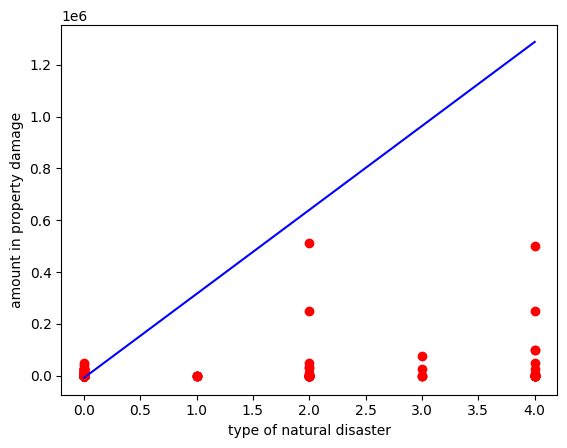

In [81]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, lin_reg_pred, color='blue')
plt.xlabel('type of natural disaster')
plt.ylabel('amount in property damage')
plt.show()